In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('daphne.csv', sep='\t', encoding='utf-16')

# Lets plot Daphne's activity over time

So first we need to import matplotlib

In [3]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

Let's look at the data file first

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 9 columns):
Unnamed: 0    134 non-null int64
Date_1        134 non-null int64
Date_2        134 non-null int64
Date_3        134 non-null object
ID_page       134 non-null int64
ID_post       134 non-null int64
Link          134 non-null object
Title         134 non-null object
Txt           120 non-null object
dtypes: int64(5), object(4)
memory usage: 9.5+ KB


In [5]:
df.head()

,Unnamed: 0,Date_1,Date_2,Date_3,ID_page,ID_post,Link,Title,Txt
0,0,2017,10,"Monday, 16 October 2:09 pm",1,97964,https://daphnecaruanagalizia.com/2017/10/first...,First things first: do something about that ho...,You can wear the flashiest watch and keep your...
1,1,2017,10,"Sunday, 15 October 10:07 pm",1,97961,https://daphnecaruanagalizia.com/2017/10/austr...,Austria’s new chancellor is 31 – and will have...,"Exit polls show that Sebastian Kurz, 31, is ab..."
2,2,2017,10,"Sunday, 15 October 7:26 pm",1,97958,https://daphnecaruanagalizia.com/2017/10/party...,The party leaders and Sunday morning,Is it going to be a five-year electoral campai...
3,3,2017,10,"Saturday, 14 October 12:52 am",1,97955,https://daphnecaruanagalizia.com/2017/10/looks...,Looks like Delia is surrounding himself with l...,The disgraceful thing is that this man has bee...
4,4,2017,10,"Saturday, 14 October 12:26 am",1,97952,https://daphnecaruanagalizia.com/2017/10/chris...,Chris Cardona: a one-track mind,“I don’t recall any other budget having given ...


So lets turn Date_3 into an actual date, here are the [codes](http://strftime.org/).

First, lets bring the year date in. We need to clean Date_1 first though

In [6]:
def clean(elem):
    elem = str(elem).split('\n')[0].strip()
    return elem

In [7]:
df['Date_1'] = df['Date_1'].apply(clean)

In [8]:
df['Date'] = df['Date_3'] + " " + df['Date_1']

In [15]:
df['Final Date'] = pd.to_datetime(df['Date'], format='%A, %d %B %I:%S %p %Y')

ValueError: time data 'n.a. 2016' does not match format '%A, %d %B %I:%S %p %Y' (match)

In [18]:
df = df[df['Date_3'] != 'n.a.']

In [19]:
df['Final Date'] = pd.to_datetime(df['Date'], format='%A, %d %B %I:%S %p %Y')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21384 entries, 0 to 21413
Data columns (total 11 columns):
Unnamed: 0    21384 non-null int64
Date_1        21384 non-null object
Date_2        21384 non-null int64
Date_3        21384 non-null object
ID_page       21384 non-null int64
ID_post       21384 non-null int64
Link          21384 non-null object
Title         21384 non-null object
Txt           18855 non-null object
Date          21384 non-null object
Final Date    21384 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 2.0+ MB


In [22]:
df.index = df['Final Date']

Let's just plot everything?

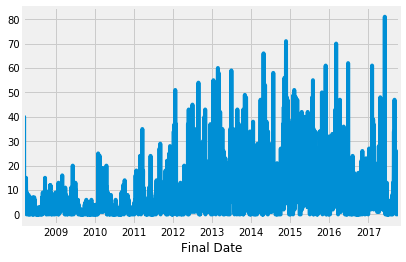

In [32]:
df.resample('B')['ID_page'].count().plot()

Most active day

In [36]:
df.resample('D')['ID_page'].count().sort_values(ascending=False).head()

Final Date
2013-11-13    48
2014-12-08    43
2014-11-25    42
2017-06-02    42
2017-05-08    40
Name: ID_page, dtype: int64

By Day

In [27]:
df.groupby(df['Final Date'].dt.weekday)['ID_page'].count()

Final Date
0    3283
1    3288
2    3246
3    3288
4    3007
5    2549
6    2723
Name: ID_page, dtype: int64

By Day

In [28]:
df.groupby(df['Final Date'].dt.week)['ID_page'].count()

Final Date
1     192
2     489
3     516
4     458
5     456
6     458
7     471
8     594
9     665
10    651
11    484
12    445
13    467
14    430
15    356
16    327
17    386
18    468
19    492
20    478
21    555
22    553
23    320
24    309
25    388
26    399
27    370
28    479
29    312
30    414
31    328
32    406
33    260
34    309
35    429
36    239
37    232
38    220
39    299
40    399
41    419
42    388
43    440
44    425
45    474
46    466
47    437
48    525
49    348
50    526
51    302
52     70
53     61
Name: ID_page, dtype: int64

By hour of day

In [29]:
df.groupby(df['Final Date'].dt.hour)['ID_page'].count()

Final Date
0     1270
1      891
2      382
3      101
4       45
5       20
6       16
7      111
8      426
9      976
10    1408
11    1428
12    1280
13    1144
14    1108
15    1099
16    1108
17    1107
18    1164
19    1231
20    1232
21    1205
22    1281
23    1351
Name: ID_page, dtype: int64